In [1]:
!pip install numpy


In [2]:
!pip install tensorflow

In [4]:
!pip install numpy==1.21.6


     ---------------------------------------- 14.0/14.0 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\family\\anaconda3\\Lib\\site-packages\\~-mpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Consider using the `--user` option or check the permissions.



In [1]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.3
anaconda-client               1.11.1
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt 

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory

# Libraries for visualization and dataset enhancement (common external enhancements)
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Path to your dataset
# Ensure dataset is structured as: dataset/person1, dataset/person2, etc.
dataset_path = r"C:\Users\family\Desktop\AIPRO2\dataset"

# Load training and validation datasets
train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # Use 20% of the data for validation
    subset="training",
    seed=123,             # Seed for reproducibility
    image_size=(180, 180), # Resize images to a consistent size
    batch_size=32          # Batch size
)



Found 570 files belonging to 3 classes.
Using 456 files for training.


In [4]:
validation_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

Found 570 files belonging to 3 classes.
Using 114 files for validation.


In [5]:
# Step 2: Data Augmentation (Recommended in slides to combat overfitting)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])


In [7]:
# Step 3: Normalize the Data (Explicitly aligns with TensorFlow practices)
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

In [9]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),  # Define the input shape explicitly here

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])


In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
# Step 5: Build the Model (Convolutional Neural Network)
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),  # Define the input shape explicitly here
    data_augmentation,  # Augmentation layer

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
# Step 6: Train the Model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
 5/15 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step - accuracy: 0.4607 - loss: 1.0866

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_5027]

NameError: name 'history' is not defined

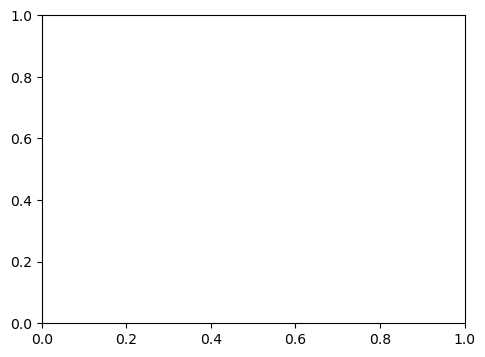